In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [8]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [19]:
# Predict a new Result
print(regressor.predict(sc_X.transform([[6.5]])))
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

[-0.27861589]


array([170370.0204065])

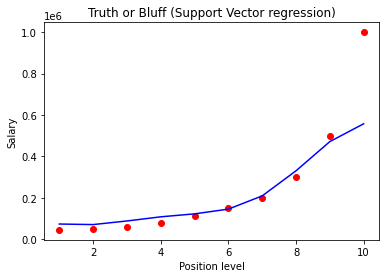

In [27]:
plt.scatter(sc_X.inverse_transform(X) , sc_Y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)) , color = 'blue')
plt.title("Truth or Bluff (Support Vector regression)")
plt.xlabel("Position level")
plt.ylabel('Salary')
plt.show()


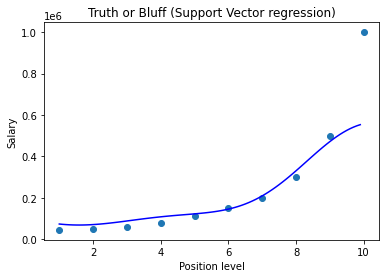

In [43]:
# Visualizing the SVR results (for higher resolution and smooth curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y))
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))) , color = 'blue')
plt.title("Truth or Bluff (Support Vector regression)")
plt.xlabel("Position level")
plt.ylabel('Salary')
plt.show()